# 03. PyTorch Computer Vision

CV에서 가증한 작업 

- 이진 분류 : 이미지가 두 클래스중 어디에 속하는지 예측
- 다중 클래스 분류 : 이미지가 3개 이상의 클래스 중 어디에 속하는지 예측
- 객체 탐지 : 이미지 속 특정 물체의 위치와 종류를 찾아냄
- 시맨틱/파놉틱 세분화(Segmentation) : 이미지에서 픽셀 단위로 물체 영역을 분리


## 목차

0. PyTorch 컴퓨터 비전 라이브러리 : torchvision
1. 데이터 불러오기 : FashionMNIST 사용
2. 데이터 준비 : PyTorch의 DataLoader를 사용해서 이미지를 배치 단위로 모델에 입력
3. 모델_0(기본 모델) : 가장 단순한 신경망 모델을 구현해서 여러 클래스를 분류할수 있도록 함
4. 모델_0 예측 및 평가
5. 디바이스 설정
6. 모델_1-비선형성 추가 : 활성화 함수 등을 활용해서 모델에 비선형성을 부여
7. 모델_2-CNN : CNN 모델 만들기
8. 모델 성능 비교
9. 최적 모델 평가
10. Confusion Matrix : 예측 정확도 분석
11. 모델 저장 및 불러오기

## 0.torchvision 소개

- torchvision
- torchvision.datasets : 다양한 예제 데이터셋 포함, 사용자 정의 데이터셋을 만들 수 있는 베이스 클래스 제공
- torchvision.models : ResNet, VGG, EfficientNet 등 사전 학습된 컴퓨터 비전 모델 아키텍쳐들이 구현되어 있음
- torchvision.transforms : 이미지를 텐서로 바꾸거나, 정규화/회전/자르기 등의 이미지 전처리 및 증강 기능 제공
- torch.utils.data.Datast : 사용자 정의 데이터셋을 만들기 위한 기반 클래스
- torch.utils.data.DataLoader : 위의 데이터셋으로 만든 데이터를 배치 단위로 공급할 수 있도록 iterable 형태로 감싸준다. 훈련 루프에서 필수적



In [14]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

print(f"PyTorch version : {torch.__version__}\ntorchvision version:{torchvision.__version__}")

PyTorch version : 2.3.0
torchvision version:0.18.0


## 1. 데이터셋 준비

datasets에 있는 FahsionMNIST()의 주요 인자 
 - root : 데이터 저장할 루트 경로 (data/에 저장)
 - train : True면 훈련용 데이터, False면 테스트용 데이터
 - download : 데이터셋이 없을 경우 자동으로 다운로드함
 - transform : 이미지에 적용할 변환 함수 (ToTensor()로 이미지를 PyTorch Tensor로 변환)
 - target_transform : 라벨에도 변환 적용 가능

In [16]:
train_data = datasets.FashionMNIST(
    root = 'data', #데이터 저장할 경로
    train = True, #훈련 데이터셋
    download = True, #다운로드 허용
    transform = ToTensor(), #이미지가 PIL 형식으로 오기 때문에 텐서로 변환해야 함
    target_transform = None #라벨 데이터 변환 여부
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

In [18]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 shape 확인

In [25]:
print(image.shape)
print(len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets))

torch.Size([1, 28, 28])
60000 60000 10000 10000


![example input and output shapes of the fashionMNIST problem](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png)

현재 이미지의 형태는 [1, 28, 28] 로 나온다. 이말은 채널이 하나(흑백 이미지), 28 X 28 픽셀 이미지라는 의미이다. <br>
만약 채널이 3이라면 RGB일 확률이 높다. <br>
이미지는 CHW(채널 우선)과 HWC(채널 마지막) 이 두 방식중 어떻게 표현할지는 여러 논의가 있다. <br>
PyTorch는 일반적으로 CHW으로 채널 우선을 기본값으로 사용한다. 


In [35]:
# 어떤 클래스가 있는지 확인하기 

print(train_data.classes)
class_name = train_data.classes

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


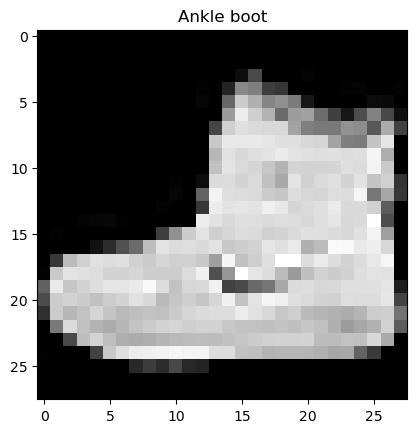

In [36]:
# 데이터 시각화하기 

image, label = train_data[0]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_name[label])
plt.show()

## 2. DataLoader 준비하기 

데이터셋을 불러오고 다음 단계는 데이터를 로딩 가능한 형태로 준비하는 것이다. 

**DataLoader**란
사이즈가 큰 단일 데이터셋을 배치 단위로 나눠서 iterable 객체로 바꿔준다. 

Q. 왜 배치로 나눠서 학습할까? <br>
A. 데이터를 나눠서 조금씩 학습하는게 계산 효율성도 좋고 메모리 부담도 줄인다. <br> 학습 업데이트 속도도 빠르기 때문에 개선 속도가 빠르다. 

적절한 배치사이즈는 2의 거듭제곱 값을 사용하고, 일반적으로 32부터 시작한다. 

In [37]:
BATCH_SIZE = 32

train_dataloader = DataLoader(
    train_data,
    batch_size = BATCH_SIZE,
    shuffle = True # 매 에폭마다 데이터를 섞을까?
)

test_dataloader = DataLoader(
    test_data,
    batch_size = BATCH_SIZE,
    shuffle = False # test데이터는 셔플이 필수는 아님
)

print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

# train_dataloader 안에 무엇이 있는지 확인해보기
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

# next()와 iter() 는 파이썬 내장함수로 iterator를 다룰 때 사용하는 표준적인 방법
# iter(obj) : 반복 가능한 객체(iterable)를 iterator로 변환
# next(iterator) : 이터레이터에서 다음 항목을 반환

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f32701a0bb0>, <torch.utils.data.dataloader.DataLoader object at 0x7f32701a0b50>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## 3. baseline model 만들기

두개의 레이어를 갖는 기본 모델을 만들고자 함

nn.Flatten() 사용해서 다차원 텐서를 1차원 벡터로 펼쳐준다. 


In [38]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [40]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units: int, output_shape:int):
        super().__init__()
        self.layer_flatten = nn.Flatten()
        self.layer_1 = nn.Linear(in_features=input_shape, out_features=hidden_units)
        self.layer_2 = nn.Linear(in_features=hidden_units, out_features=output_shape)

    def forward(self, x):
        x = self.layer_flatten(x)
        x = self.layer_1(x)
        x = self.layer_2(x)
        return x

In [41]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape = 784, 
    hidden_units = 10,
    output_shape = len(class_name)
)



In [42]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [43]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [45]:
# CPU와 GPU에서의 학습 속도를 비교하는 타이머 함수

from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """시작 시간과 종료 시간의 차이 출력

    Args:
        start (float) : 연산 시작 시간 (timeit 포맷)
        end (float) : 연산 종료 시간
        device ([type], optional) : 연산이 동작하고 있는 디바이스

    Returns:
        float: 초단위의 시작 시간과 종료시간의 차이 (수가 큰게 더 긴 것)
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### 3.3 훈련 루프 및 배치 데이터 기반 모델 훈련

지금까지의 과정 :데이터, 데이터로더 -> 모델 -> 손실함수 -> 옵티마이저 -> 정확도 함수 ->  타이머 함수 



In [48]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in range(epochs):
    print(f"Epoch: {epoch}\n-------")

    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        if batch%400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:

            test_pred = model_0(X)
            test_loss += loss_fn(test_pred, y)

            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 21.723 seconds


## 4. 베이스라인 예측 결과 

여러 모델을 만들어서 비교할 예정이라면 모델을 평가하는 함수를 만드는 것이 좋다. 

In [50]:
torch.manual_seed(42) 

# argument에' ':' 이거는 type hint
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 5. device setting

In [52]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. 비선형성이 추가된 모델 만들기

선형은 직선을 의미하고 비선형은 일직선이 아님을 의미한다. 
이번에 비선형 함수인 nn.ReLU()을 각 레이어 사이에 추가하여 모델을 만들어 보자.


In [58]:

class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_flatten = nn.Flatten()
        self.layer_1 = nn.Linear(in_features = input_shape, out_features = hidden_units)
        self.relu_1 = nn.ReLU()
        self.layer_2 = nn.Linear(in_features = hidden_units, out_features = output_shape)
        self.relu_2 = nn.ReLU()

    def forward(self, x):
        x = self.layer_flatten(x)
        x = self.layer_1(x)
        x = self.relu_1(x)
        x = self.layer_2(x)
        x = self.relu_2(x)
        
        return x

In [59]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape = 784,
                              hidden_units = 10, 
                             output_shape = len(class_name)).to(device)

next(model_1.parameters()).device # 모델 디바이스 확인
                            

device(type='cuda', index=0)

In [60]:
# 로스 함수, 옵티마이저, 평가 메트릭 설정

from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.1)


### 6.2 기존 train loop 와 test loop를 함수화하기

기존의 for문을 이용해서 루프를 돌리는 것보다 함수화하면 재사용할 수 있고 다양한 모델을 실험할 때 편리함

In [89]:

def train_step(model: nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device: torch.device = device):

    train_loss, train_acc = 0, 0
    model.to(device)

    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device) # 사용할 데이터를 사용 가능한 device로 옮기기

        y_pred = model(X)

        loss = loss_fn(y_pred, y) # pytor에서는 (input, target) 순이 일반적, tensorflow와는 반대
        train_loss += loss
        train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1)) #CrossEntropyLoss를 쓰면 모델이 logits 형태([B, C])로 나오기 때문에 argmax(dim=1)을 사용하면 가장 큰 값의 인덱스를 반환

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(model: nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

    test_loss, test_acc = 0, 0
    model.to(device)

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device) # 사용할 데이터를 사용 가능한 device로 옮기기
    
            test_pred = model(X)
    
            loss = loss_fn(test_pred, y) # pytor에서는 (input, target) 순이 일반적, tensorflow와는 반대
            test_loss += loss
            test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim=1)) #CrossEntropyLoss를 쓰면 모델이 logits 형태([B, C])로 나오기 때문에 argmax(dim=1)을 사용하면 가장 큰 값의 인덱스를 반환
    
    
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")

In [68]:
torch.manual_seed(42)

from timeit import default_timer as timer 
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    print("---"*12)
    
    train_step(model = model_1,
              data_loader = train_dataloader,
              loss_fn = loss_fn,
              optimizer = optimizer,
              accuracy_fn = accuracy_fn)

    test_step(model = model_1,
             data_loader = test_dataloader,
             loss_fn = loss_fn,
             accuracy_fn = accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu, end = train_time_end_on_gpu, device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------------------------------
Train loss: 0.59716 | Train accuracy: 77.89%
Train loss: 0.63200 | Train accuracy: 76.94%
Epoch: 1
------------------------------------
Train loss: 0.59111 | Train accuracy: 78.13%
Train loss: 0.63649 | Train accuracy: 76.77%
Epoch: 2
------------------------------------
Train loss: 0.55725 | Train accuracy: 79.50%
Train loss: 0.44730 | Train accuracy: 85.02%
Train time on cuda: 21.447 seconds


GPU를 사용하는게 항상 더 빠르지는 않다. 

-> 데이터셋과 모델 크기가 작을 경우 : GPU로 복사하는데 드는 시간(오버헤드)가 오히려 손해<br>
-> 데이터 이동 병목 현산(보틀넥)

어떤 하드웨어를 사용하냐에 따라 달라진다

In [69]:
torch.manual_seed(42)

model_1_results = eval_model(model=model_1,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn)

model_1_results

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

평가에 사용하는 데이터가 아직 CPU에 있기 때문에 발생하는 문제 

-> eval_model 함수를 수정해서 device 인자를 넣자. 

In [73]:
torch.manual_seed(42) 

# argument에' ':' 이거는 type hint
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
              device: torch.device = device):
    
    loss, acc = 0, 0
    
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

model_1_results = eval_model(model=model_1,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn,
                            device = device)

model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.4473024606704712,
 'model_acc': 85.02396166134186}

In [74]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 7. CNN을 이용한 모델 만들기

아래에서 구현할 모델은 tinyVGG로 VGGNet이라는 모델을 간단히 줄인 버전.<br>
CNN 모델에서 핵심 용어는 다음과 같다. 

- 합성곱 층(Convlutional layer) : kernel을 이용하여 입력 이미지의 국소 영역에 연산 수행, 이미지의 지역적인 특징 추출.
- 활성화 함수 층(Activation layer) : 보통 ReLU 사용, 비선형성을 부여.
- 풀링 층(Pooling layer) : 특성 맵(feature map)의 크기를 줄이고 계산량을 줄이며, 주요 정보를 유지하면서 노이즈를 줄임. 보통 Max Pooling 사용


cf) 어떤 모델을 사용하는게 좋을까?

문제 유형에 따라 일반적으로 사용하는 모델 유형은 다음과 같다. <br>

구조화된 데이터(tabular data) : 그래디언트 부스팅, 랜덤 포레스트, XGBoost ...

비구조적 데이터(이미지, 자연어) : 합성곱 신경망(CNN), 트랜스포머

In [76]:
# 커스텀 블럭을 클래스로 따로 만드기 
class ConvBlock_1(nn.Module):
    def __init__(self, input_shape, hidden_units):
        super().__init__()  # nn.Module.__init__(self)를 의미
        self.Conv2d_1 = nn.Conv2d(in_channels = input_shape,
                                 out_channels = hidden_units,
                                 kernel_size = 3,
                                 stride = 1,
                                 padding = 1)
        self.relu_1 = nn.ReLU()
        self.Conv2d_2 = nn.Conv2d(in_channels = hidden_units,
                                 out_channels = hidden_units,
                                 kernel_size = 3,
                                 stride = 1,
                                 padding = 1)
        self.relu_2 = nn.ReLU()
        self.pooling = nn.MaxPool2d(kernel_size = 2,
                                   stride = 2)

    def forward(self, x):
        x = self.Conv2d_1(x)
        x = self.relu_1(x)
        x = self.Conv2d_2(x)
        x = self.relu_2(x)
        x = self.pooling(x)

        return x

class ConvBlock_2(nn.Module):
    def __init__(self, hidden_units):
        super().__init__()
        self.Conv2d_1 = nn.Conv2d(in_channels = hidden_units,
                                 out_channels = hidden_units,
                                 kernel_size = 3,
                                 padding = 1)
        self.relu_1 = nn.ReLU()
        self.Conv2d_2 = nn.Conv2d(in_channels = hidden_units, 
                                  out_channels = hidden_units, kernel_size= 3, padding = 1)
        self.relu_2 = nn.ReLU()
        self.pooling = nn.MaxPool2d(2)

    def forward(self, x):
        x = self.Conv2d_1(x)
        x = self.relu_1(x)
        x = self.Conv2d_2(x)
        x = self.relu_2(x)
        x = self.pooling(x)
        return x
        
class classifierBlock(nn.Module):
    def __init__(self, hidden_units, output_shape):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_1 = nn.Linear(in_features = hidden_units*7*7,
                                 out_features = output_shape)

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear_1(x)
        return x

class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.block1 = ConvBlock_1(input_shape, hidden_units)
        self.block2 = ConvBlock_2(hidden_units)
        self.block3 = classifierBlock(hidden_units, output_shape)

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        return x

        

In [78]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1, hidden_units = 10, output_shape = len(class_name)).to(device)
model_2

FashionMNISTModelV2(
  (block1): ConvBlock_1(
    (Conv2d_1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_1): ReLU()
    (Conv2d_2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_2): ReLU()
    (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): ConvBlock_2(
    (Conv2d_1): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_1): ReLU()
    (Conv2d_2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_2): ReLU()
    (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): classifierBlock(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (linear_1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [85]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)


In [90]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    print("----"*12)
    train_step(data_loader = train_dataloader,
              model = model_2,
              loss_fn = loss_fn,
              optimizer = optimizer,
              accuracy_fn = accuracy_fn,
              device = device)
    
    test_step(data_loader = test_dataloader,
             model = model_2,
              loss_fn = loss_fn,
             accuracy_fn = accuracy_fn,
             device = device)
    print("\n")

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------------------------------------------
Train loss: 0.26545 | Train accuracy: 90.42%
Test loss: 0.29065 | Test accuracy: 89.41%


Epoch: 1
------------------------------------------------
Train loss: 0.25851 | Train accuracy: 90.62%
Test loss: 0.29585 | Test accuracy: 89.10%


Epoch: 2
------------------------------------------------
Train loss: 0.25617 | Train accuracy: 90.64%
Test loss: 0.30236 | Test accuracy: 89.12%


Train time on cuda: 32.290 seconds


In [92]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.30236008763313293,
 'model_acc': 89.11741214057508}

In [93]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.447302,85.023962
2,FashionMNISTModelV2,0.302360,89.117412


In [95]:
compare_results["Training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,Training_time
0,FashionMNISTModelV0,0.476639,83.426518,21.723346
1,FashionMNISTModelV1,0.447302,85.023962,21.446918
2,FashionMNISTModelV2,0.302360,89.117412,32.289785


In [103]:
def make_predictions(model, data, device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)

            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

In [104]:
import random 
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_name[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [105]:
pred_probs = make_predictions(model = model_2, data = test_samples, device = device)

pred_probs[:2]

tensor([[1.6712e-09, 2.6994e-10, 1.2613e-09, 1.4900e-11, 6.6185e-12, 9.9999e-01,
         2.3347e-09, 5.9549e-09, 7.4321e-07, 6.6573e-06],
        [9.5534e-02, 8.6930e-01, 2.4703e-04, 2.4607e-03, 2.8862e-02, 1.6383e-05,
         3.5630e-03, 3.0501e-06, 1.0099e-05, 8.6886e-06]])

In [106]:
pred_classes = pred_probs.argmax(dim=1)
print(pred_classes)
test_labels, pred_classes


tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])


([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

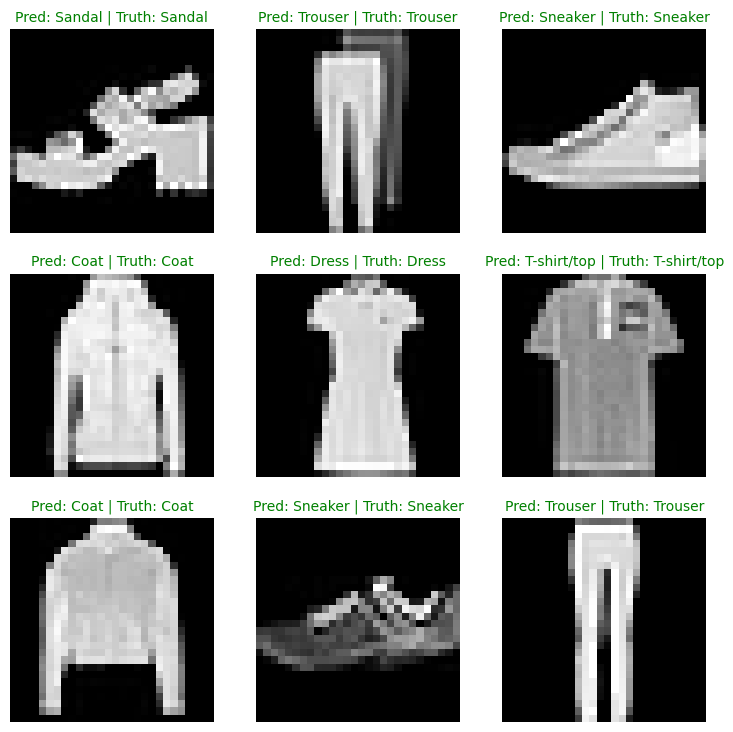

In [109]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_name[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_name[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## 11. 모델 저장하고 불러오기 

torch.save & torch.load & torch.nn.Moduleload_state_dict() 이용


In [112]:
from pathlib import Path

MODEL_PATH = Path("models")  # Path은 경로를 objcet 형태로 사용 가능
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(), f = MODEL_SAVE_PATH)



Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [114]:
loaded_model_2 = FashionMNISTModelV2(input_shape = 1, 
                                    hidden_units = 10, 
                                    output_shape = 10)
loaded_model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

loaded_model_2 = loaded_model_2.to(device)
                               

In [115]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.30236008763313293,
 'model_acc': 89.11741214057508}

In [116]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.30236008763313293,
 'model_acc': 89.11741214057508}

torch.isclose() 함수 사용해서 두 텐서가 얼마나 가까운 값인지 판단
atol : 절대 허용 오차
rtol : 상대 허용 오차
torch.isclose(tensor1, tensor2, rtol=1e-05, atol=1e-08)
반환은 각 텐서의 위치에서 오차 이내로 가까우면 True, 그렇지 않으면 False

In [117]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)